<a href="https://colab.research.google.com/github/idityaGE/Generative-AI/blob/main/LangChain%20-%20Basic%20to%20Advance/2_Multi_dataframe_Agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**In LangChain, the Agent can access many dataframes at once**

#**01: Install All the Required Packages**

In [2]:
!pip install langchain langchain_experimental
!pip install watermark
!pip install -U langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.9 MB/s eta 0:00:00


#**02: Import All The Required Libraries**

In [3]:
import os
import warnings
warnings.filterwarnings("ignore")

In [4]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_google_genai import ChatGoogleGenerativeAI

In [5]:
import pandas as pd

#**03: Setup the Environment**


In [6]:
os.environ['GOOGLE_API_KEY'] = ""

#**04:Data**

In [7]:
url = "https://raw.githubusercontent.com/adamerose/datasets/master/titanic.csv"
df=pd.read_csv(url)
print(df.shape)
df.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1ngi8NnRkhso8DmsX2D28m_CZFshNLxl8D57niB9hh8k#gid=0


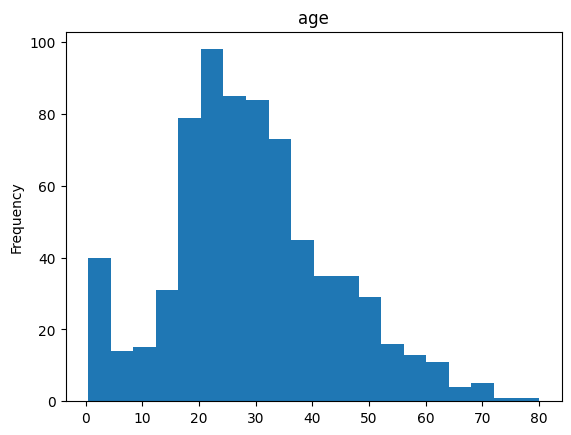

In [11]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(True)

#**05: Single DataFrame Example**

#**Agent can interact with Single DataFrame**

In [12]:
llm=ChatGoogleGenerativeAI(model='gemini-pro')

In [13]:
agent=create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)

In [14]:
agent.run("How many rows are there")

<ipython-input-14-a556688d9c7e>:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  agent.run("How many rows are there")




> Entering new AgentExecutor chain...
Thought: This is a simple property of the dataframe
Action: python_repl_ast
Action Input: df.shape[0]891Final Answer: 891

> Finished chain.


'891'

In [15]:
agent.run("How many people have more than 23 age")



> Entering new AgentExecutor chain...
Thought: I should use the `df.age > 23` operation to find all values that are greater than 23
Action: python_repl_ast
Action Input: df.age > 230      False
1       True
2       True
3       True
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: age, Length: 891, dtype: boolAction: python_repl_ast
Action Input: df.age > 23].sum()SyntaxError: unmatched ']' (<unknown>, line 1)Action: python_repl_ast
Action Input: df[df.age > 23].shape[0]468I now know the final answer
Final Answer: 468

> Finished chain.


'468'

#**06: Multi DataFrame Example**

#**Agent can also interact with Multiple DataFrames passed in a list**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [17]:
df1=df.copy()

In [18]:
df1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [19]:
df1["age"] = df1["age"].fillna(df1["age"].mean())

In [ ]:
agent=create_pandas_dataframe_agent(llm, [df, df1], verbose=True,allow_dangerous_code=True)

In [20]:
agent.run("How many rows in the age column are different")



> Entering new AgentExecutor chain...
Thought: I should use the pandas function `nunique` to count the unique values in the age column
Action: python_repl_ast
Action Input: df['age'].nunique()88Question: How many rows in the age column are different
Thought: I should use the pandas function `nunique` to count the unique values in the age column
Action: python_repl_ast
Action Input: df['age'].nunique()88Question: How many rows in the age column are different
Thought: I should use the pandas function `nunique` to count the unique values in the age column
Action: python_repl_ast
Action Input: df['age'].nunique()88Question: How many rows in the age column are different
Thought: I should use the pandas function `nunique` to count the unique values in the age column
Action: python_repl_ast
Action Input: df['age'].nunique()88Question: How many rows in the age column are different
Thought: I should use the pandas function `nunique` to count the unique values in the age column
Action: python_

'Agent stopped due to iteration limit or time limit.'

In [ ]:
df2=df1.copy()

In [ ]:
df2["Age_Multiplied"]=df1["age"] * 2

In [ ]:
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Multiplied
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,44.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,76.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,52.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,70.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,70.0


In [ ]:
agent=create_pandas_dataframe_agent(llm, [df,df1, df2], verbose=True, allow_dangerous_code=True)

In [ ]:
agent.run("Are the number of columns same in all the dataframe")

Thought: To compare the number of columns, I can use the len function on each dataframe
Action: len
Action Input: df1.columnslen is not a valid tool, try one of [python_repl_ast].To use the len function, I need to use it with a list
Action: len
Action Input: list(df1.columns)len is not a valid tool, try one of [python_repl_ast]. To compare the number of columns, I can use the shape attribute which returns the number of rows and columns in a dataframe
Action: shape
Action Input: df1.shapeshape is not a valid tool, try one of [python_repl_ast]. To compare the number of columns, I can use the shape attribute and get the number of columns from the second value in the tuple
Action: shape
Action Input: df1.shape[1]shape is not a valid tool, try one of [python_repl_ast]. I need to check the shape of all three dataframes and compare the number of columns
Action: print
Action Input: print(df1.shape[1], df2.shape[1], df3.shape[1])print is not a valid tool, try one of [python_repl_ast]. I can use

'Agent stopped due to iteration limit or time limit.'